<p align="center">
<a href="https://colab.research.google.com/drive/13vjFNGToWj1ZgEIN2r2swHnvfwnKO62i?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
</p>

# RECOMMENDER SYSTEM

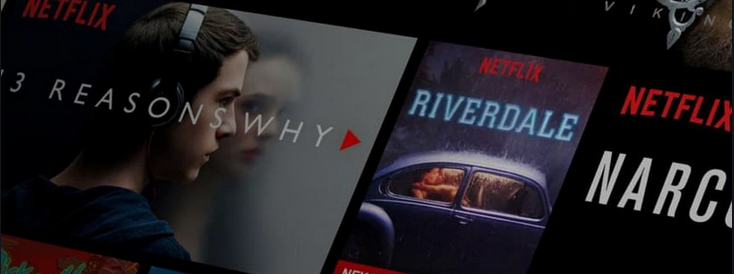

# Context

These files contain metadata for all 45,000 movies listed in the Full MovieLens Dataset. The dataset consists of movies released on or before July 2017. Data points include cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies, countries, TMDB vote counts and vote averages.

This dataset also has files containing 26 million ratings from 270,000 users for all 45,000 movies. Ratings are on a scale of 1-5 and have been obtained from the official GroupLens website.

## Acknowledgements

This dataset is an ensemble of data collected from TMDB and GroupLens.
The Movie Details, Credits and Keywords have been collected from the TMDB Open API. This product uses the TMDb API but is not endorsed or certified by TMDb. Their API also provides access to data on many additional movies, actors and actresses, crew members, and TV shows. You can try it for yourself here.

The Movie Links and Ratings have been obtained from the Official GroupLens website.




### Methods:
1. SIMPLE RECOMMENDER SYSTEM
2. CONTENT BASED RECOMMENDER
3. COLLABORATIVE FILTERING

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
files.upload()

Saving movies_metadata.csv to movies_metadata.csv


In [ ]:
df = pd.read_csv("movies_metadata.csv")

In [ ]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
df.shape

(8965, 24)

In [ ]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [ ]:
df.dtypes

adult                       bool
belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
id                         int64
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                    int64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8965 entries, 0 to 8964
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  8965 non-null   bool   
 1   belongs_to_collection  1273 non-null   object 
 2   budget                 8965 non-null   int64  
 3   genres                 8965 non-null   object 
 4   homepage               565 non-null    object 
 5   id                     8965 non-null   int64  
 6   imdb_id                8965 non-null   object 
 7   original_language      8965 non-null   object 
 8   original_title         8965 non-null   object 
 9   overview               8940 non-null   object 
 10  popularity             8965 non-null   float64
 11  poster_path            8934 non-null   object 
 12  production_companies   8965 non-null   object 
 13  production_countries   8965 non-null   object 
 14  release_date           8960 non-null   object 
 15  reve

In [ ]:
df.shape

(45466, 24)

In [ ]:
df.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [ ]:
df.drop(columns=["belongs_to_collection","homepage","tagline"],inplace=True)

In [ ]:
df.genres.unique()

array(["[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]",
       "[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]",
       "[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",
       ...,
       "[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name': 'Crime'}, {'id': 36, 'name': 'History'}]",
       "[{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}, {'id': 80, 'name': 'Crime'}, {'id': 9648, 'name': 'Mystery'}]",
       "[{'id': 80, 'name': 'Crime'}, {'id': 99, 'name': 'Documentary'}, {'id': 18, 'name': 'Drama'}]"],
      dtype=object)

**Using literal_eval library to extract the Genres of the movies**

In [ ]:
from ast import literal_eval
df["genres"] = df['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [ ]:
df.head()

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
0,False,30000000,"[Animation, Comedy, Family]",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,False,7.7,5415.0
1,False,65000000,"[Adventure, Fantasy, Family]",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,False,6.9,2413.0
2,False,0,"[Romance, Comedy]",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,False,6.5,92.0
3,False,16000000,"[Comedy, Drama, Romance]",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,False,6.1,34.0
4,False,0,[Comedy],11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,False,5.7,173.0


**USING THE IMDB WEIGHTED RATING METHOD**

We can use the average ratings of the movie as the score but using this won't be fair enough since a movie with 8.9 average rating and only 3 votes cannot be considered better than the movie with 7.8 as as average rating but 40 votes. So, I'll be using IMDB's weighted rating (wr) which is given as :-
where,
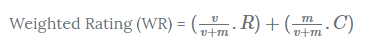


    v is the number of votes for the movie;
    m is the minimum votes required to be listed in the chart;
    R is the average rating of the movie; And
    C is the mean vote across the whole report

We already have v(vote_count) and R (vote_average) and C can be calculated as

In [ ]:
C= df['vote_average'].mean()
C

6.109861668897814

In [ ]:
m= df['vote_count'].quantile(0.5)
m

33.0

Now, we can filter out the movies that qualify for the chart

In [ ]:
q_movies = df.copy().loc[df['vote_count'] >= m]
q_movies.shape

(4527, 21)

In [ ]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [ ]:
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [ ]:
q_movies.head()

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count,score
0,False,30000000,"[Animation, Comedy, Family]",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,False,7.7,5415.0,7.690368
1,False,65000000,"[Adventure, Fantasy, Family]",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,False,6.9,2413.0,6.889340
2,False,0,"[Romance, Comedy]",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,False,6.5,92.0,6.397003
3,False,16000000,"[Comedy, Drama, Romance]",31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,False,6.1,34.0,6.104857
4,False,0,[Comedy],11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,False,5.7,173.0,5.765657


In [ ]:
selected_features = ['title', 'release_date', 'vote_count', 'vote_average', 'popularity', 'genres','vote_count','vote_average','score']

In [ ]:
q_movies = q_movies[selected_features]

In [ ]:
q_movies.head()

,title,release_date,vote_count,vote_average,popularity,genres,vote_count,vote_average,score
0,Toy Story,1995-10-30,5415.0,7.7,21.946943,"[Animation, Comedy, Family]",5415.0,7.7,7.690368
1,Jumanji,1995-12-15,2413.0,6.9,17.015539,"[Adventure, Fantasy, Family]",2413.0,6.9,6.889340
2,Grumpier Old Men,1995-12-22,92.0,6.5,11.712900,"[Romance, Comedy]",92.0,6.5,6.397003
3,Waiting to Exhale,1995-12-22,34.0,6.1,3.859495,"[Comedy, Drama, Romance]",34.0,6.1,6.104857
4,Father of the Bride Part II,1995-02-10,173.0,5.7,8.387519,[Comedy],173.0,5.7,5.765657


In [ ]:
q_movies = q_movies.sort_values('score', ascending=False)

In [ ]:
q_movies.head(10)

,title,release_date,vote_count,vote_average,popularity,genres,vote_count,vote_average,score
314,The Shawshank Redemption,1994-09-23,8358.0,8.5,51.645403,"[Drama, Crime]",8358.0,8.5,8.490600
834,The Godfather,1972-03-14,6024.0,8.5,41.109264,"[Drama, Crime]",6024.0,8.5,8.486978
2843,Fight Club,1999-10-15,9678.0,8.3,63.869599,[Drama],9678.0,8.3,8.292557
292,Pulp Fiction,1994-09-10,8670.0,8.3,140.950236,"[Thriller, Crime]",8670.0,8.3,8.291695
522,Schindler's List,1993-11-29,4436.0,8.3,41.725123,"[Drama, History, War]",4436.0,8.3,8.283828
5481,Spirited Away,2001-07-20,3968.0,8.3,41.048867,"[Fantasy, Adventure, Animation, Family]",3968.0,8.3,8.281936
2211,Life Is Beautiful,1997-12-20,3643.0,8.3,39.394970,"[Comedy, Drama]",3643.0,8.3,8.280339
1178,The Godfather: Part II,1974-12-20,3418.0,8.3,36.629307,"[Drama, Crime]",3418.0,8.3,8.279057
1152,One Flew Over the Cuckoo's Nest,1975-11-18,3001.0,8.3,35.529554,[Drama],3001.0,8.3,8.276178
1176,Psycho,1960-06-16,2405.0,8.3,36.826309,"[Drama, Horror, Thriller]",2405.0,8.3,8.270355


In [ ]:
q_movies.dtypes

title            object
release_date     object
vote_count      float64
vote_average    float64
popularity      float64
genres           object
vote_count      float64
vote_average    float64
score           float64
dtype: object

In [ ]:
q_movies['popularity'] = q_movies['popularity'].astype('float64')

Text(0.5, 1.0, 'Popular Movies')

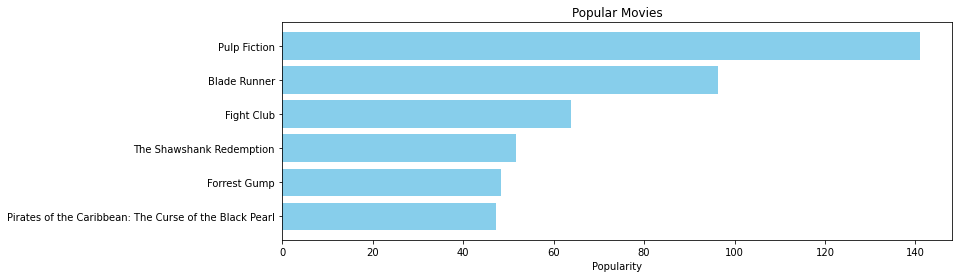

In [ ]:
pop= q_movies.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

Text(0.5, 1.0, 'Movies Title')

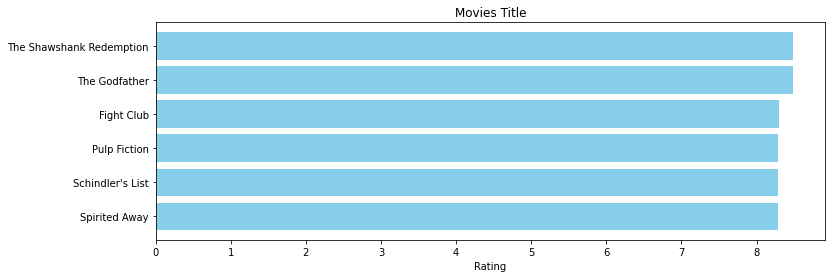

In [ ]:
pop= q_movies.sort_values('score', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['score'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Rating")
plt.title("Movies Title")

## SIMPLE RECOMMENDER SYSTEM BASED ON GENRES

**As all the films had more than one genres we seperate into different rows**

In [ ]:
# We take the each genre from list of genre of each row and make them each row using the stack function and drop the main genre column

#create the pandas series
genre_sep = q_movies.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
#give the series name
genre_sep.name = 'genre'
#join the series with the main dataframe
gen_q_movies = q_movies.drop('genres', axis=1).join(genre_sep)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


In [ ]:
gen_q_movies.head(10)

,title,release_date,vote_count,vote_average,popularity,vote_count,vote_average,score,genre
0,Toy Story,1995-10-30,5415.0,7.7,21.946943,5415.0,7.7,7.690368,Animation
0,Toy Story,1995-10-30,5415.0,7.7,21.946943,5415.0,7.7,7.690368,Comedy
0,Toy Story,1995-10-30,5415.0,7.7,21.946943,5415.0,7.7,7.690368,Family
1,Jumanji,1995-12-15,2413.0,6.9,17.015539,2413.0,6.9,6.889340,Adventure
1,Jumanji,1995-12-15,2413.0,6.9,17.015539,2413.0,6.9,6.889340,Fantasy
1,Jumanji,1995-12-15,2413.0,6.9,17.015539,2413.0,6.9,6.889340,Family
2,Grumpier Old Men,1995-12-22,92.0,6.5,11.712900,92.0,6.5,6.397003,Romance
2,Grumpier Old Men,1995-12-22,92.0,6.5,11.712900,92.0,6.5,6.397003,Comedy
3,Waiting to Exhale,1995-12-22,34.0,6.1,3.859495,34.0,6.1,6.104857,Comedy
3,Waiting to Exhale,1995-12-22,34.0,6.1,3.859495,34.0,6.1,6.104857,Drama


**UDF for getting the top 10 genre movies**

In [ ]:
gen_q_movies.genre.unique()

array(['Animation', 'Comedy', 'Family', 'Adventure', 'Fantasy', 'Romance',
       'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'History',
       'Science Fiction', 'Mystery', 'War', 'Music', 'Documentary',
       'Foreign', 'Western', nan, 'TV Movie'], dtype=object)

In [ ]:
def get_movies(genre):
  movie = gen_q_movies[gen_q_movies['genre'] == genre]
  movie = movie.sort_values('score',ascending=False).head(10).reset_index()
  return movie

In [ ]:
get_movies('Romance')

,index,title,release_date,vote_count,vote_average,popularity,vote_count,vote_average,score,genre
0,351,Forrest Gump,1994-07-06,8147.0,8.2,48.307194,8147.0,8.2,8.191568,Romance
1,1132,Cinema Paradiso,1988-11-17,834.0,8.2,14.177005,834.0,8.2,8.120445,Romance
2,3189,City Lights,1931-01-30,444.0,8.2,10.891524,444.0,8.2,8.055399,Romance
3,882,The Apartment,1960-06-15,498.0,8.1,11.994281,498.0,8.1,7.976319,Romance
4,876,Vertigo,1958-05-09,1162.0,8.0,18.208220,1162.0,8.0,7.947804,Romance
5,883,Some Like It Hot,1959-03-18,835.0,8.0,11.845107,835.0,8.0,7.928140,Romance
6,7208,Eternal Sunshine of the Spotless Mind,2004-03-19,3758.0,7.9,12.906327,3758.0,7.9,7.884417,Romance
7,885,Casablanca,1942-11-26,1462.0,7.9,13.916101,1462.0,7.9,7.860485,Romance
8,872,Singin' in the Rain,1952-04-10,747.0,7.9,11.064858,747.0,7.9,7.824263,Romance
9,4843,Amélie,2001-04-25,3403.0,7.8,12.879381,3403.0,7.8,7.783768,Romance


In [ ]:
get_movies('History')

,index,title,release_date,vote_count,vote_average,popularity,vote_count,vote_average,score,genre
0,522,Schindler's List,1993-11-29,4436.0,8.3,41.725123,4436.0,8.3,8.283828,History
1,1919,Saving Private Ryan,1998-07-24,5148.0,7.9,21.758054,5148.0,7.9,7.888598,History
2,6833,The Passion of Joan of Arc,1928-04-21,159.0,8.2,8.903953,159.0,8.2,7.840757,History
3,2200,The Elephant Man,1980-10-02,740.0,7.9,8.405672,740.0,7.9,7.823578,History
4,1189,Das Boot,1981-09-16,623.0,7.9,8.803380,623.0,7.9,7.809947,History
5,8553,Harakiri,1962-09-15,136.0,8.2,9.286966,136.0,8.2,7.791866,History
6,6669,Come and See,1985-07-01,174.0,8.1,12.643242,174.0,8.1,7.782732,History
7,1182,Amadeus,1984-10-26,1107.0,7.8,12.677592,1107.0,7.8,7.751075,History
8,1174,Ran,1985-06-01,349.0,7.9,12.250232,349.0,7.9,7.745355,History
9,8502,Night and Fog,1955-01-01,97.0,8.3,11.144661,97.0,8.3,7.744042,History


Based on genre we can recommend users the top to movies to watch.

This is one of the simplest way to recommend a movie based on the user likability of genre

Now we try to recommend users based on the popularity of the movies

In [ ]:
#getting the movies which belongs to the top 10 percentile of popularity
gen_q_movies['popularity'].quantile(0.90)

13.500142800000003

In [ ]:
def get_movies_pop():
  movie = gen_q_movies[gen_q_movies['popularity'] > 13]
  movie = movie.sort_values(['popularity','score'],ascending=False)
  return movie.drop_duplicates(subset = "title").head(10).reset_index()

In [ ]:
get_movies_pop()

,index,title,release_date,vote_count,vote_average,popularity,vote_count,vote_average,score,genre
0,292,Pulp Fiction,1994-09-10,8670.0,8.3,140.950236,8670.0,8.3,8.291695,Thriller
1,536,Blade Runner,1982-06-25,3833.0,7.9,96.272374,3833.0,7.9,7.884719,Science Fiction
2,2843,Fight Club,1999-10-15,9678.0,8.3,63.869599,9678.0,8.3,8.292557,Drama
3,314,The Shawshank Redemption,1994-09-23,8358.0,8.5,51.645403,8358.0,8.5,8.490600,Drama
4,351,Forrest Gump,1994-07-06,8147.0,8.2,48.307194,8147.0,8.2,8.191568,Comedy
5,6390,Pirates of the Caribbean: The Curse of the Bla...,2003-07-09,7191.0,7.5,47.326665,7191.0,7.5,7.493650,Adventure
6,256,Star Wars,1977-05-25,6778.0,8.1,42.149697,6778.0,8.1,8.090358,Adventure
7,522,Schindler's List,1993-11-29,4436.0,8.3,41.725123,4436.0,8.3,8.283828,Drama
8,834,The Godfather,1972-03-14,6024.0,8.5,41.109264,6024.0,8.5,8.486978,Drama
9,5481,Spirited Away,2001-07-20,3968.0,8.3,41.048867,3968.0,8.3,8.281936,Fantasy


For the new users we suggest the movies which are the most popular at the current time

## Content Based Recommender

In [ ]:
df = pd.read_csv("movies_metadata.csv")

In [ ]:
#We won't be working on the whole dataset so we take a smaller dataset to compute the TF-IDF
small = pd.read_csv("links_small.csv")

In [ ]:
small.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
#these id were not getting converted to float
df = df.drop([19730, 29503, 35587])

In [ ]:
df['id'] = df['id'].astype('float')

In [ ]:
tmdbID = small['tmdbId']

In [ ]:
#Subsetting to make it a smaller database
df = df[df['id'].isin(tmdbID)]

In [ ]:
df.shape

(9099, 24)

In [ ]:
df.isnull().sum()

adult                       0
belongs_to_collection    7425
budget                      0
genres                      0
homepage                 7125
id                          0
imdb_id                     0
original_language           0
original_title              0
overview                   12
popularity                  0
poster_path                 3
production_companies        0
production_countries        0
release_date                0
revenue                     0
runtime                     0
spoken_languages            0
status                      2
tagline                  2066
title                       0
video                       0
vote_average                0
vote_count                  0
dtype: int64

In [ ]:
#making a new attribute to keep both the content of overview and tagline in a single series
df['tagline'] = df['tagline'].fillna('')
df['description'] = df['overview'] + df['tagline']
df['description'] = df['description'].fillna('')

In [ ]:
#All the content in the description column are text, so we need to transform it into number for the pc to understand
#TF-IDF method is used to convert Text to number matrix
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
#analyzer = 'word' which means take each word at a time, n_gram(1,2) use unigram and Bigram, stop_words =English means it will ignore the the stop words
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
#Create the tfidf matrix
tfidf_matrix = tf.fit_transform(df['description'])

In [ ]:
#Creates a very sparse matrix
tfidf_matrix.shape

(9099, 268124)

In [ ]:
#Get the similarity among the given movies using cosine similarity
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
df['score'] = df.apply(weighted_rating, axis=1)

In [ ]:
df = df.reset_index()

In [ ]:
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

In [ ]:
indices.head()

title
Toy Story                      0
Jumanji                        1
Grumpier Old Men               2
Waiting to Exhale              3
Father of the Bride Part II    4
dtype: int64

We need to get the index of the movie given its title

Get the list of cosine similarity scores for that particular movie with all movies. Convert it into a list of tuples where the first element is its position and the second is the similarity score.

Sort the aforementioned list of tuples based on the similarity scores; that is, the second element.

Get the top 10 elements of this list. Ignore the first element as it refers to self (the movie most similar to a particular movie is the movie itself)

Return the titles corresponding to the indices of the top elements.

In [ ]:
def get_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return pd.DataFrame(df['title'].iloc[movie_indices])

In [ ]:
get_recommendations("Vertigo")

,title
8180,Hitchcock
3026,Groove
3820,The Cheap Detective
1730,Marnie
8554,Godzilla
4993,Foul Play
1410,Storefront Hitchcock
8597,Dawn of the Planet of the Apes
8885,Inside Out
3782,Dirty Harry


In [ ]:
get_recommendations("Spotlight")

,title
8548,"A Fragile Trust: Plagiarism, Power, and Jayson..."
4993,Foul Play
3615,Jesus of Montreal
4386,Evelyn
7034,Martyrs
6536,Deliver Us from Evil
6934,An American Crime
7405,Hachi: A Dog's Tale
5200,The Bells of St. Mary's
7884,Buck


In [ ]:
def improved_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]
    movies = df.iloc[movie_indices][['title','score','release_date']]
    movies = movies.sort_values('score', ascending=False).head(10)
    return movies.reset_index()


In [ ]:
improved_recommendations("The Godfather")

,index,title,score,release_date
0,973,The Godfather: Part II,8.279057,1974-12-20
1,2192,The Color Purple,7.561178,1985-12-18
2,2412,American Movie,7.116949,1999-11-05
3,1582,The Godfather: Part III,7.079855,1990-12-24
4,5667,Fury,6.853879,1936-05-29
5,4221,8 Women,6.786632,2002-01-08
6,7657,The Tillman Story,6.690874,2010-08-22
7,6398,Renaissance,6.524553,2006-03-16
8,5406,The Kid Brother,6.502727,1927-01-17
9,7591,Machete,6.294789,2010-09-01


Still to do...

Based on Movie Director,Based on Production Company,Based on Country of Release

## COLLABORATIVE FILTERING

Our content based engine suffers from some severe limitations. It is only capable of suggesting movies which are close to a certain movie. That is, it is not capable of capturing tastes and providing recommendations across genres.

Also, the engine that we built is not really personal in that it doesn't capture the personal tastes and biases of a user. Anyone querying our engine for recommendations based on a movie will receive the same recommendations for that movie, regardless of who she/he is.

We will use a technique called Collaborative Filtering to make recommendations to Movie Watchers

In [ ]:
#Using a small dataset for computation purpose
rating = pd.read_csv("ratings_small.csv")

In [ ]:
rating.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


Here we will be using Singular Value Decomposition to predict movies to users based on their own preference, while we compute the similarity matrix for an user or item we face the issue of sparsity and scalability, SVD takes care of the above two issue as it treats the Dataset as an optimization problem and solves the sparsity issue by Matrix Factorization and computing its singular values, and gives back a new matrix which is a matrix with prediction of each users rating on each movies, so on basis of it we suggest movies to user

Evaluation metric for SVD can be RMSE,MAE

In [ ]:
! pip install surprise

In [ ]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
reader =  Reader()
data = Dataset.load_from_df(rating[['userId', 'movieId', 'rating']], reader)

In [ ]:
svd = SVD()
cross_validate(svd, data, measures=['rmse', 'mae'],cv=5)

{'fit_time': (5.02769923210144,
  5.013343095779419,
  5.017705917358398,
  5.031953811645508,
  5.017189264297485),
 'test_mae': array([0.68880026, 0.68994773, 0.69433304, 0.69278022, 0.69121656]),
 'test_rmse': array([0.89516877, 0.89685975, 0.90380238, 0.89782348, 0.89802757]),
 'test_time': (0.2590010166168213,
  0.14159893989562988,
  0.23196005821228027,
  0.14672589302062988,
  0.23067116737365723)}



We get a mean Root Mean Sqaure Error of 0.89 approx which is more than good enough for our case. Let us now train on our dataset and arrive at predictions

In [ ]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [ ]:
svd.predict(1, 302)

Prediction(uid=1, iid=302, r_ui=None, est=2.931589458112464, details={'was_impossible': False})

In [ ]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [ ]:
id_map = small[['movieId', 'tmdbId']]
id_map['tmdbId'] = id_map['tmdbId'].apply(convert_int)
id_map.columns = ['movieId', 'id']
id_map = id_map.merge(df[['title', 'id']], on='id').set_index('title')

In [ ]:
indices_map = id_map.set_index('id')

In [ ]:
def hybrid(userId, title):
    idx = indices[title]
    tmdbId = id_map.loc[title]['id']
    #print(idx)
    movie_id = id_map.loc[title]['movieId']
    
    sim_scores = list(enumerate(cosine_sim[int(idx)]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]
    
    movies = df.iloc[movie_indices][['title', 'vote_count', 'vote_average', 'release_date', 'id']]
    movies['est'] = movies['id'].apply(lambda x: svd.predict(userId, indices_map.loc[x]['movieId']).est)
    movies = movies.sort_values('est', ascending=False)
    return movies.reset_index().head(10)

In [ ]:
hybrid(500,'Avatar')

,index,title,vote_count,vote_average,release_date,id,est
0,1898,A Simple Plan,191.0,6.9,1998-12-11,10223.0,3.381196
1,975,A Grand Day Out,199.0,7.4,1990-05-18,530.0,3.281681
2,3360,The Dish,62.0,6.6,2000-07-11,5257.0,3.280016
3,6105,A Trip to the Moon,314.0,7.9,1902-09-01,775.0,3.232201
4,2854,The Hidden,85.0,6.7,1987-10-30,12476.0,3.133432
5,7460,Green Zone,730.0,6.4,2010-03-11,22972.0,3.087753
6,7587,The American,488.0,5.8,2010-08-31,27579.0,3.086405
7,4643,"Heaven Knows, Mr. Allison",27.0,6.8,1957-03-13,37103.0,3.068062
8,3018,Rocketship X-M,15.0,5.1,1950-06-02,37744.0,3.055107
9,3713,Jeepers Creepers,731.0,6.1,2001-07-01,8922.0,3.021906


In [ ]:
hybrid(2,'The American')

,index,title,vote_count,vote_average,release_date,id,est
0,3097,The Ballad of Ramblin' Jack,0.0,0.0,2000-01-26,161687.0,3.723935
1,4255,Punch-Drunk Love,542.0,6.9,2002-10-25,8051.0,3.683651
2,8056,Jack-Jack Attack,216.0,7.4,2004-12-31,13932.0,3.621340
3,434,Lightning Jack,40.0,5.7,1994-03-11,22317.0,3.600305
4,4260,Auto Focus,56.0,6.1,2002-10-18,14112.0,3.589279
5,4608,Love the Hard Way,8.0,7.2,2003-03-27,39125.0,3.550000
6,5669,Mr. Deeds Goes to Town,69.0,7.3,1936-04-12,24807.0,3.546229
7,7393,Avatar,12114.0,7.2,2009-12-10,19995.0,3.546087
8,4104,Insomnia,1181.0,6.8,2002-05-24,320.0,3.545232
9,7763,Hanna,1284.0,6.5,2011-04-07,50456.0,3.526065


Recommendation based on Collaborative Filtering are used in most real life scenarios as it is based on User preferences, going forward we will try to use ALS and SGD as the optimization problem rather than SVD which is better in most cases

# THANK YOU!


---

